# optional notebook to plot and calibrate the results from the multilayer perceptron model

In [5]:
import pandas as pd
import numpy as np
import pickle

import sys
#path to the functions folder
sys.path.append('../onc_functions')

# import custom functions
from plot_functions import onc_plot_calibration_curve, onc_plot_risk, onc_plot_roc, onc_plot_roc_no_threshold
from calibrate_onc import calibrate_onc

import sys
print('python-' + sys.version)
print('pandas-' + pd.__version__)

python-3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
pandas-1.1.5


In [2]:
#import the pooled results from the MLP model
with open('./results/2021_final_MLP_model_test_pred_proba_pooled.pickle', 'rb') as f:
        data = pickle.load(f)

#keep the columns we need for calibration
data = data.loc[:,['score','died_in_90','subset','usrds_id']]
data = data.rename(columns={'died_in_90':'y'})
data.head()

,score,y,subset,usrds_id
0,0.693623,1.0,9,31089.0
1,0.658592,0.0,8,34521.0
2,0.477407,0.0,8,46751.0
3,0.560426,0.0,9,50506.0
4,0.216050,0.0,8,54985.0


# Plot original model's calibration cuve

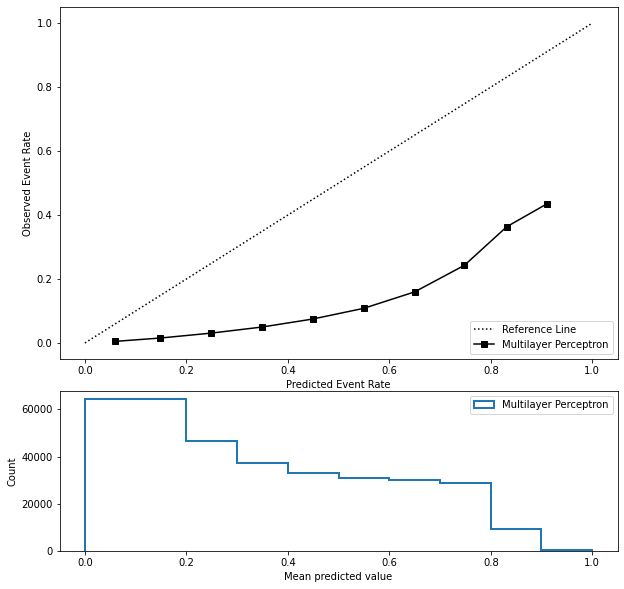

In [3]:
onc_plot_calibration_curve(
                y_true=data.y, 
                y_proba=data.score, 
                label='Multilayer Perceptron',
                filename='./results/mlp_orig_calibration')

# Plot original model mortality risk

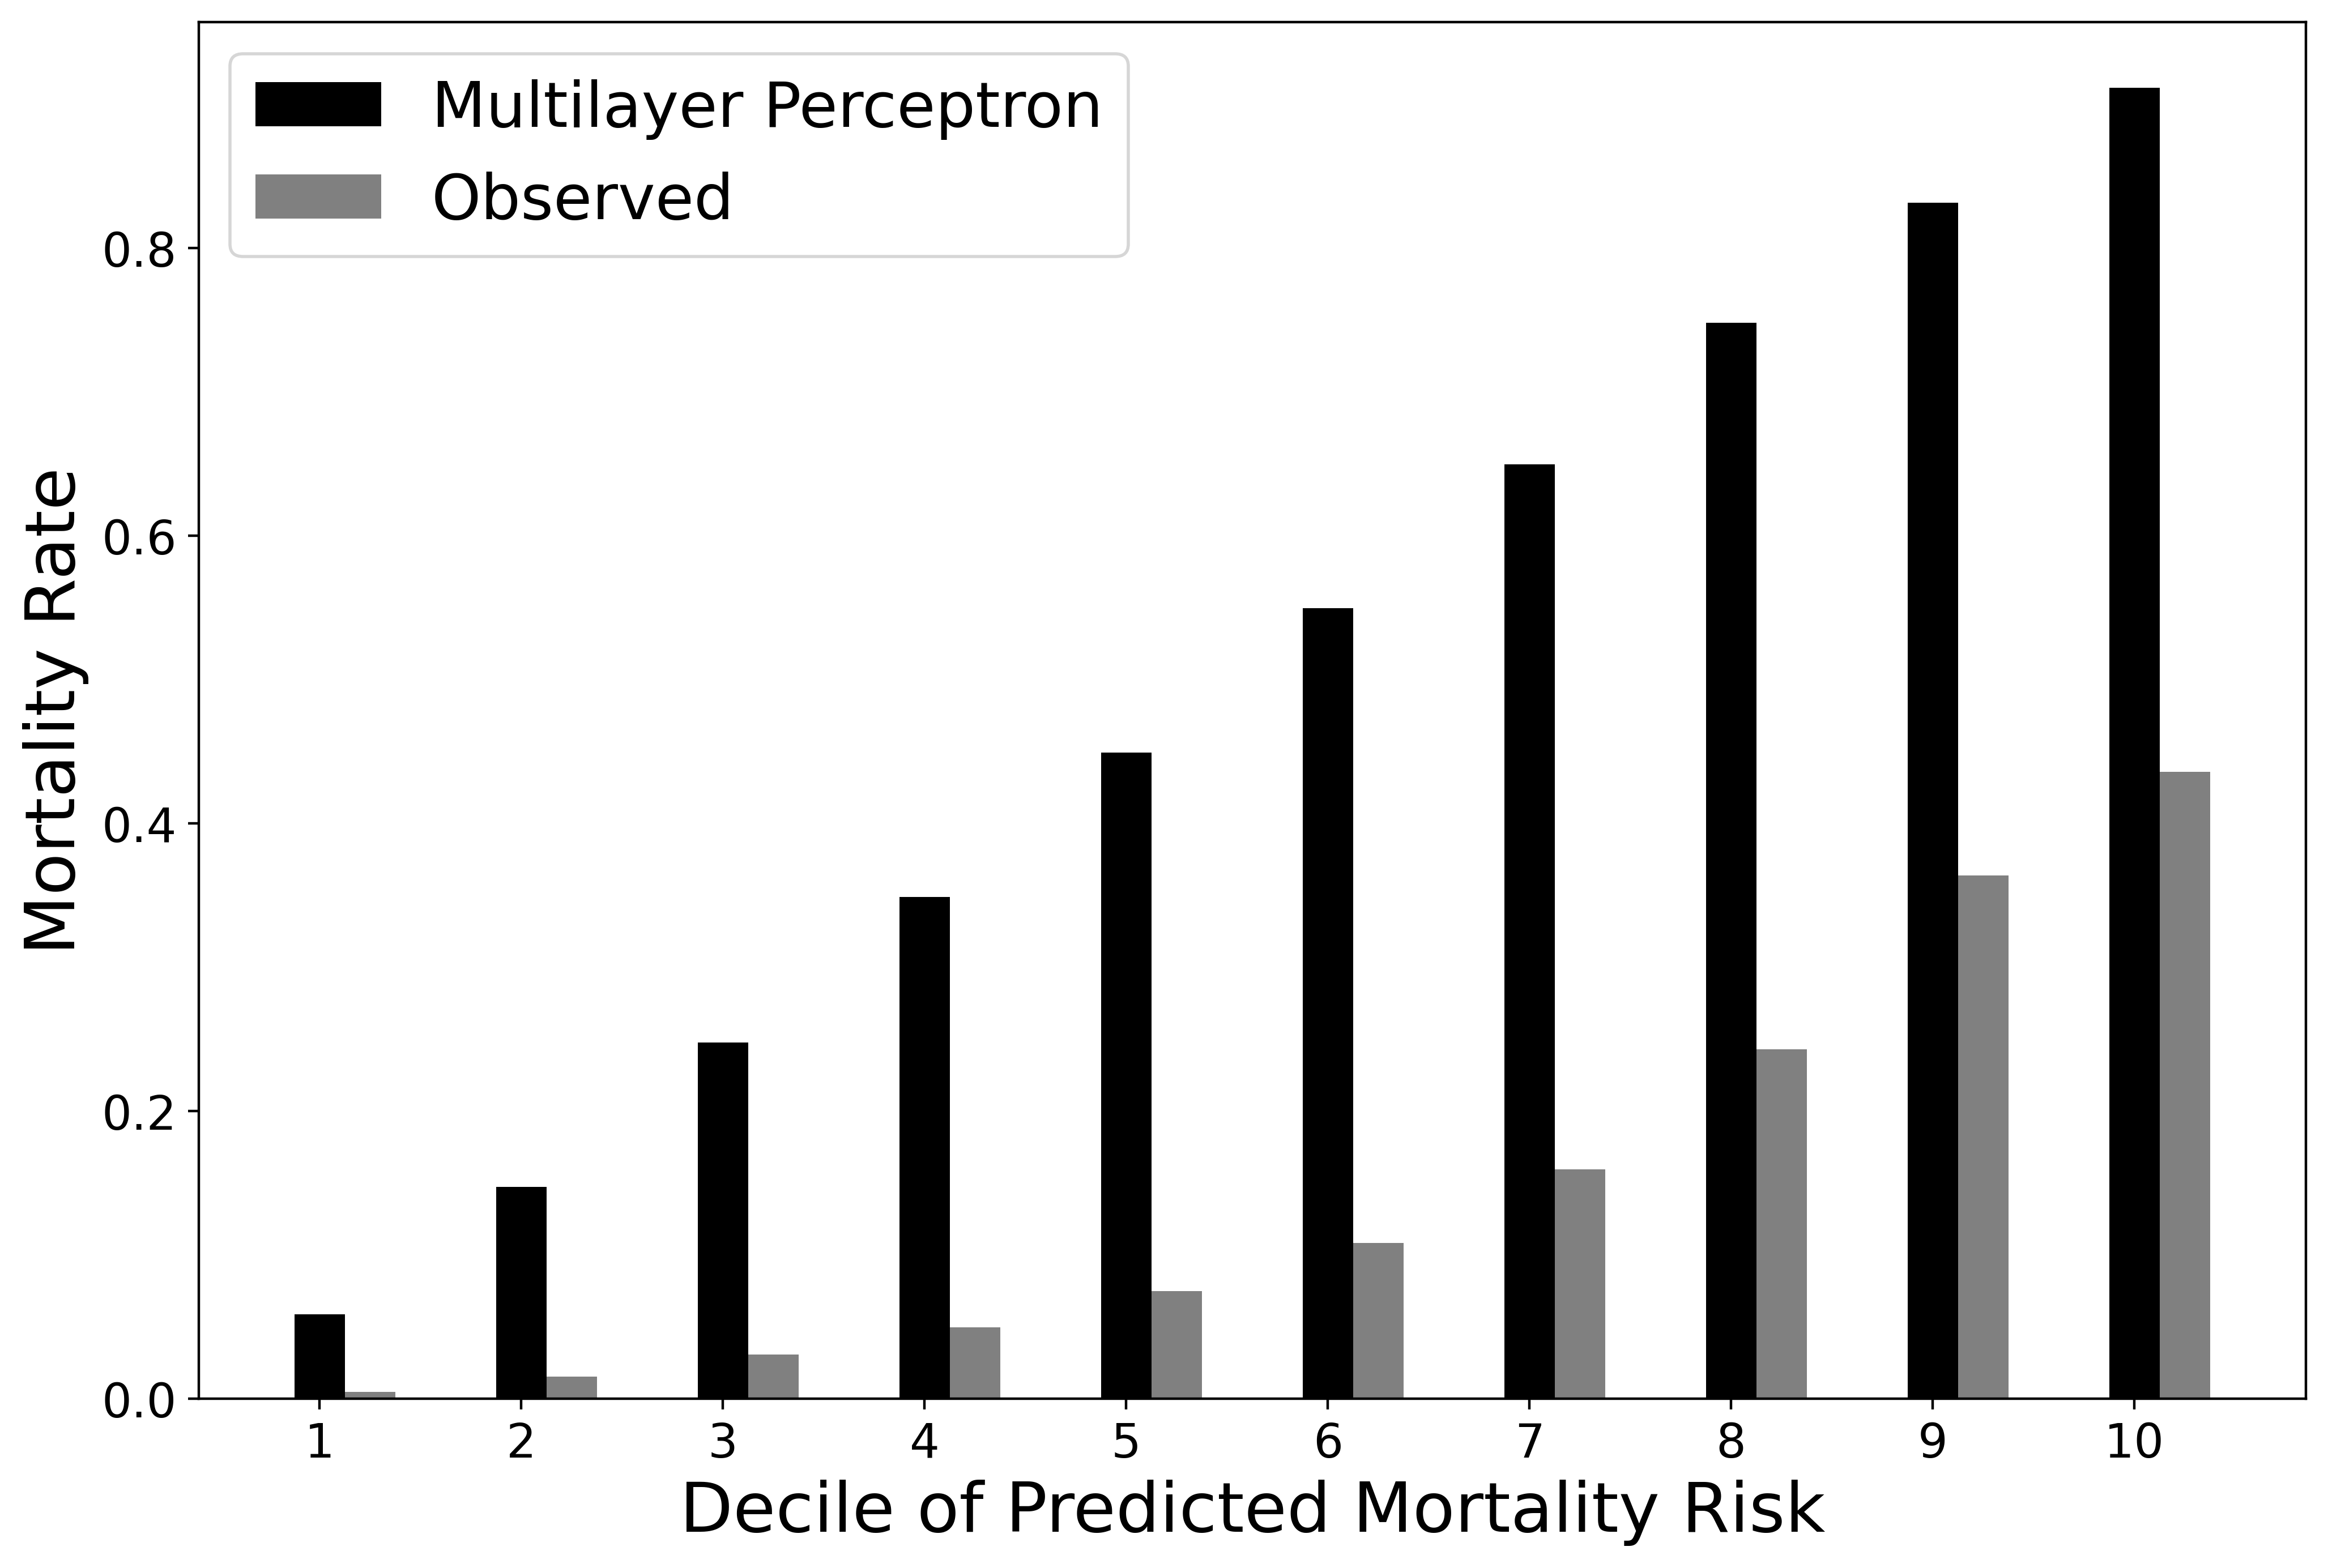

In [7]:
onc_plot_risk(
    y_true=data.y, 
    y_proba=data.score, 
    label='Multilayer Perceptron',
    filename='./results/mlp_not_calibrated_mortality_bar')

# Calibrate model
### model can be calibrated by training an isotonic regression on a portion of the testing set. 

In order to split the predictions from the test set into a new test/train set for the classifier, pull in the subset information from the postgres data and merge it with the predictions from the MLP model.

In [4]:
calibrated_results = calibrate_onc(
                          data, 
                          path='./results/',
                          model_name='mlp')

accuracy - original/calibrated: 0.7457565121970336 / 0.9254069306672008
ROC AUC - original/calibrated:      0.8139406743284859 / 0.8137064708850548
avg precision - original/calibrated: 0.2595816025475993 / 0.25312729484254326
	Brier: 0.061


# Plot the calibration curve of the calibrated results

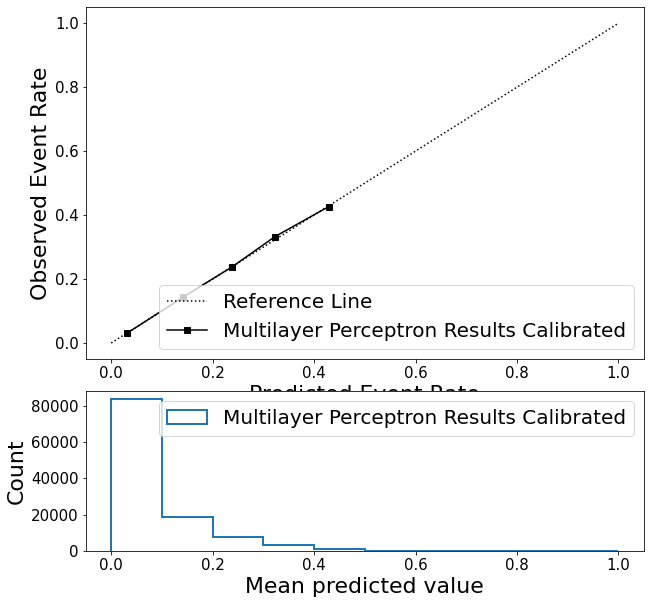

In [8]:
onc_plot_calibration_curve(
                y_true=calibrated_results.y, 
                y_proba=calibrated_results.p_calibrated, 
                label='Multilayer Perceptron Results Calibrated',
                filename='./results/mlp_calibration_curve_calibrated')

# Plot mortality risk of calibrated

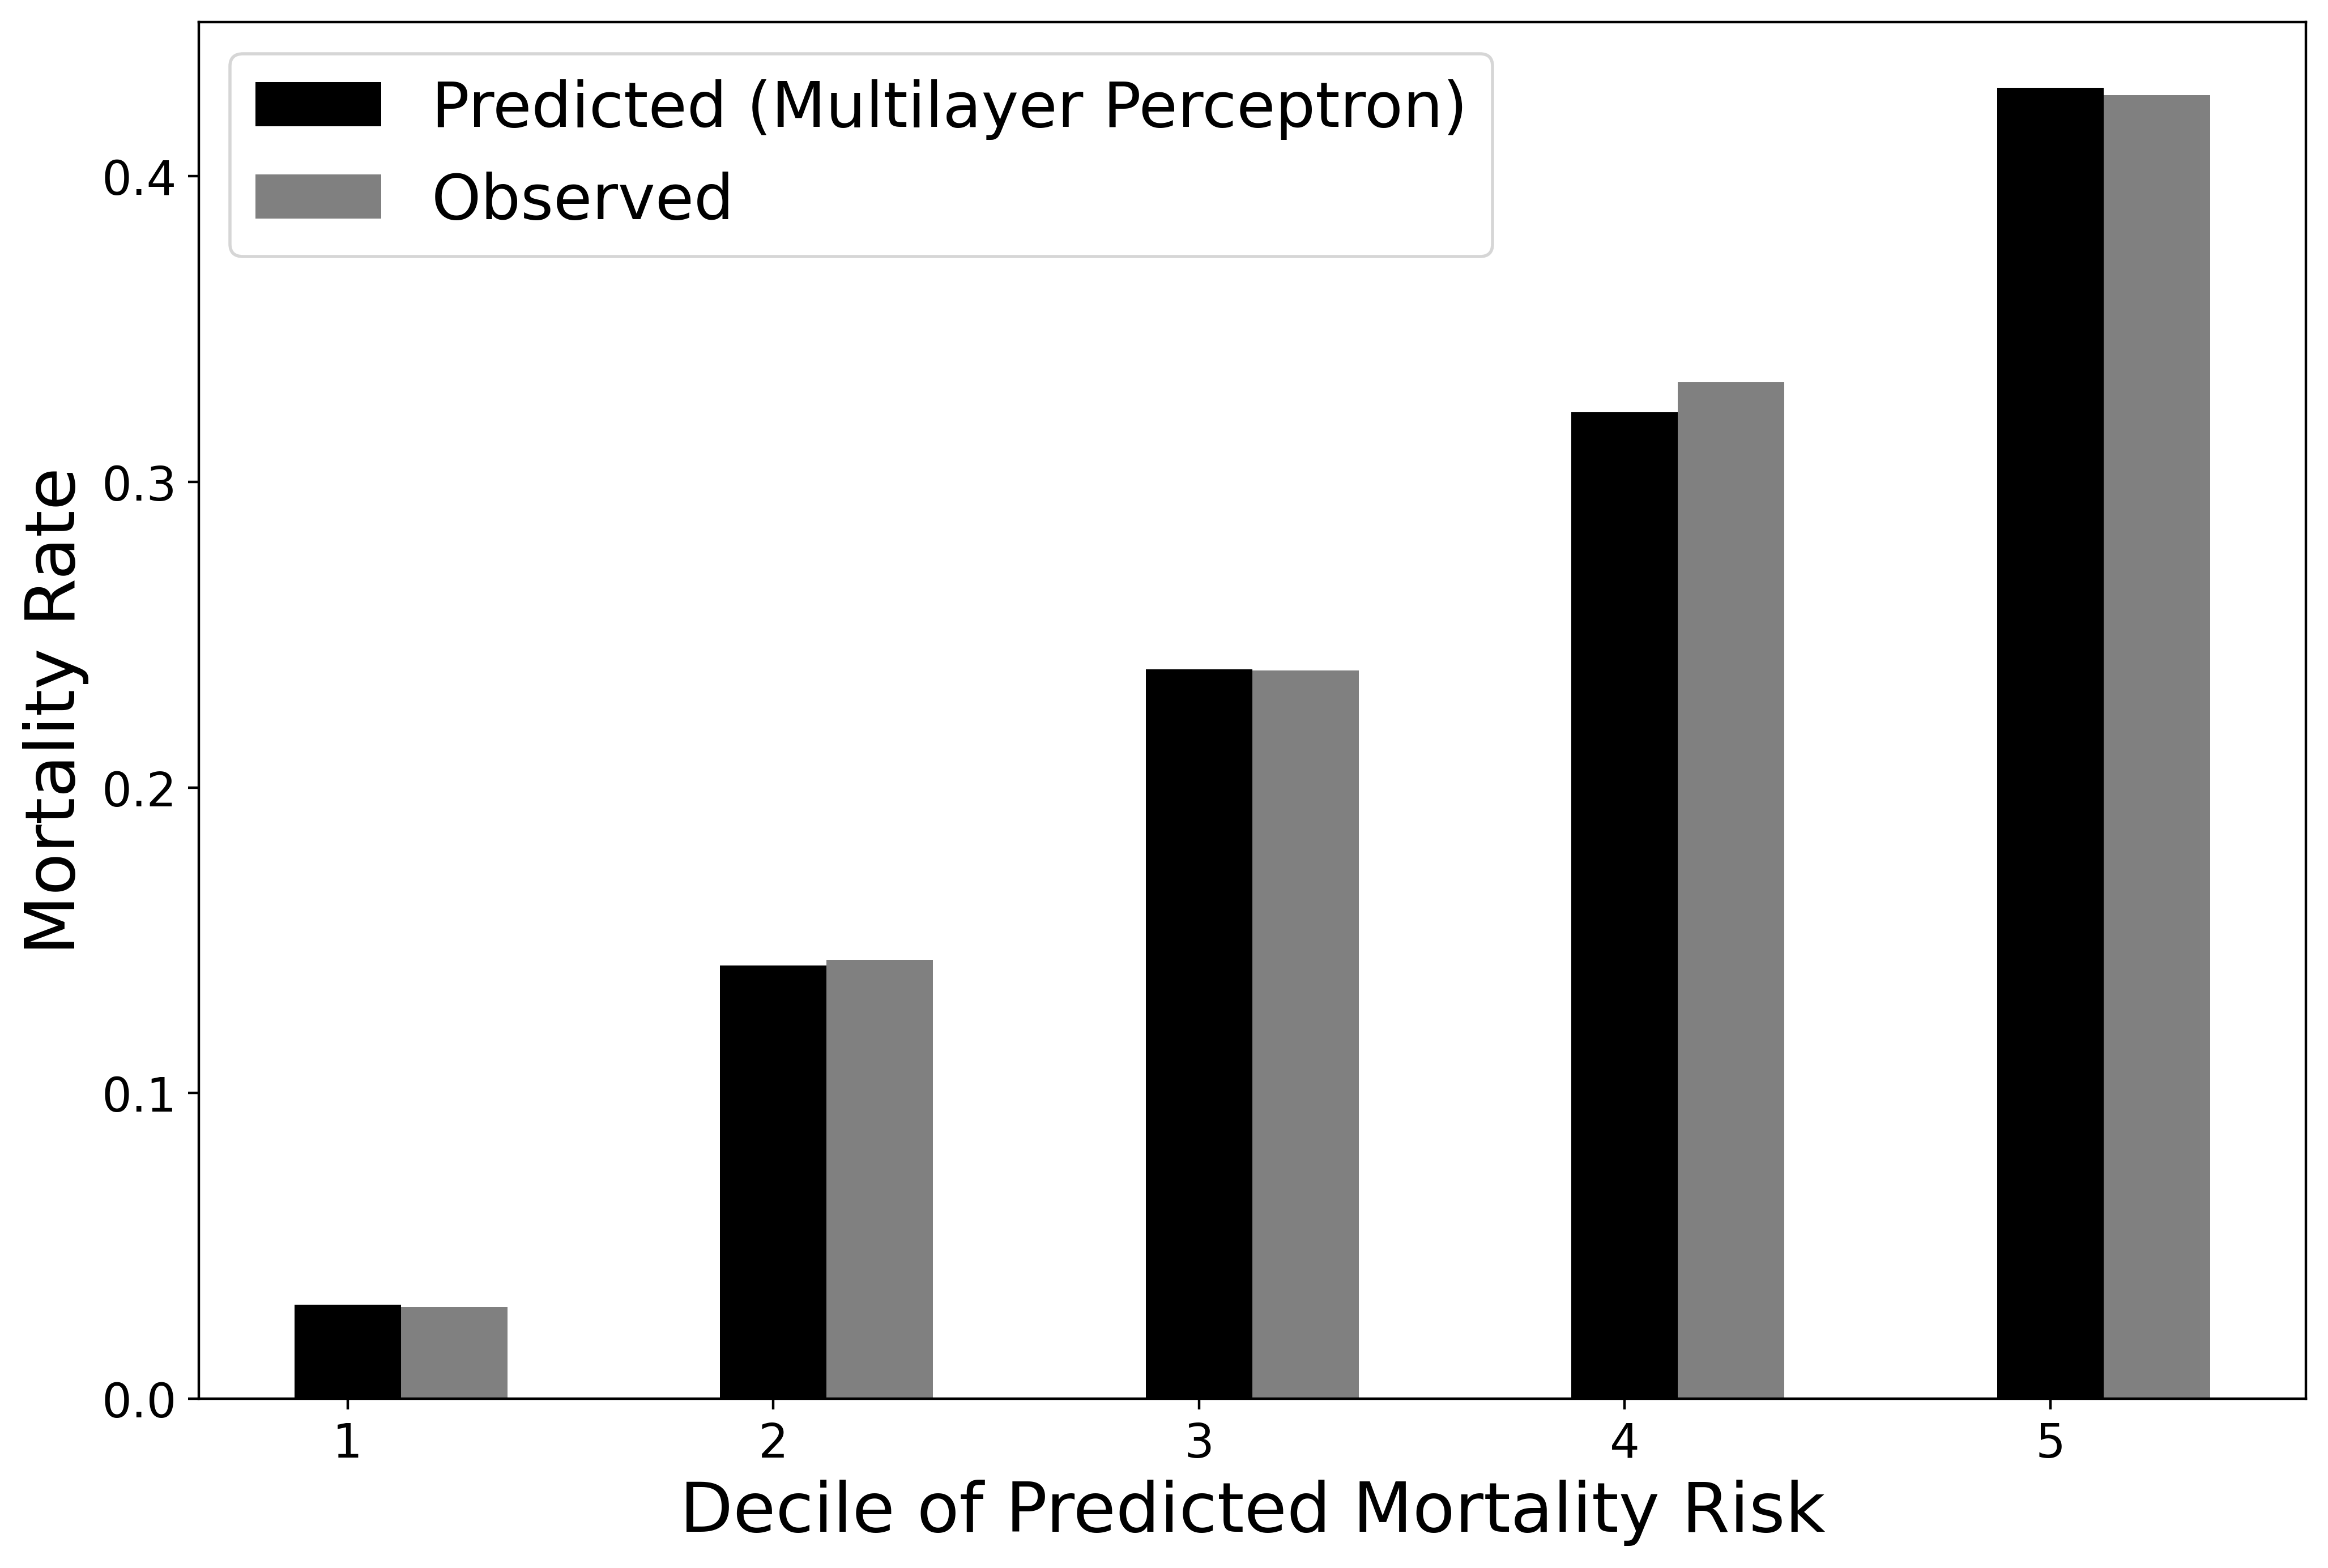

In [9]:
onc_plot_risk(
    y_true=calibrated_results.y, 
    y_proba=calibrated_results.p_calibrated, 
    label='Predicted (Multilayer Perceptron)',
    filename='./results/mlp_calibrated_mortality_bar')

# Plot ROC AUC of calibrated with thresholds at 50% and 20%

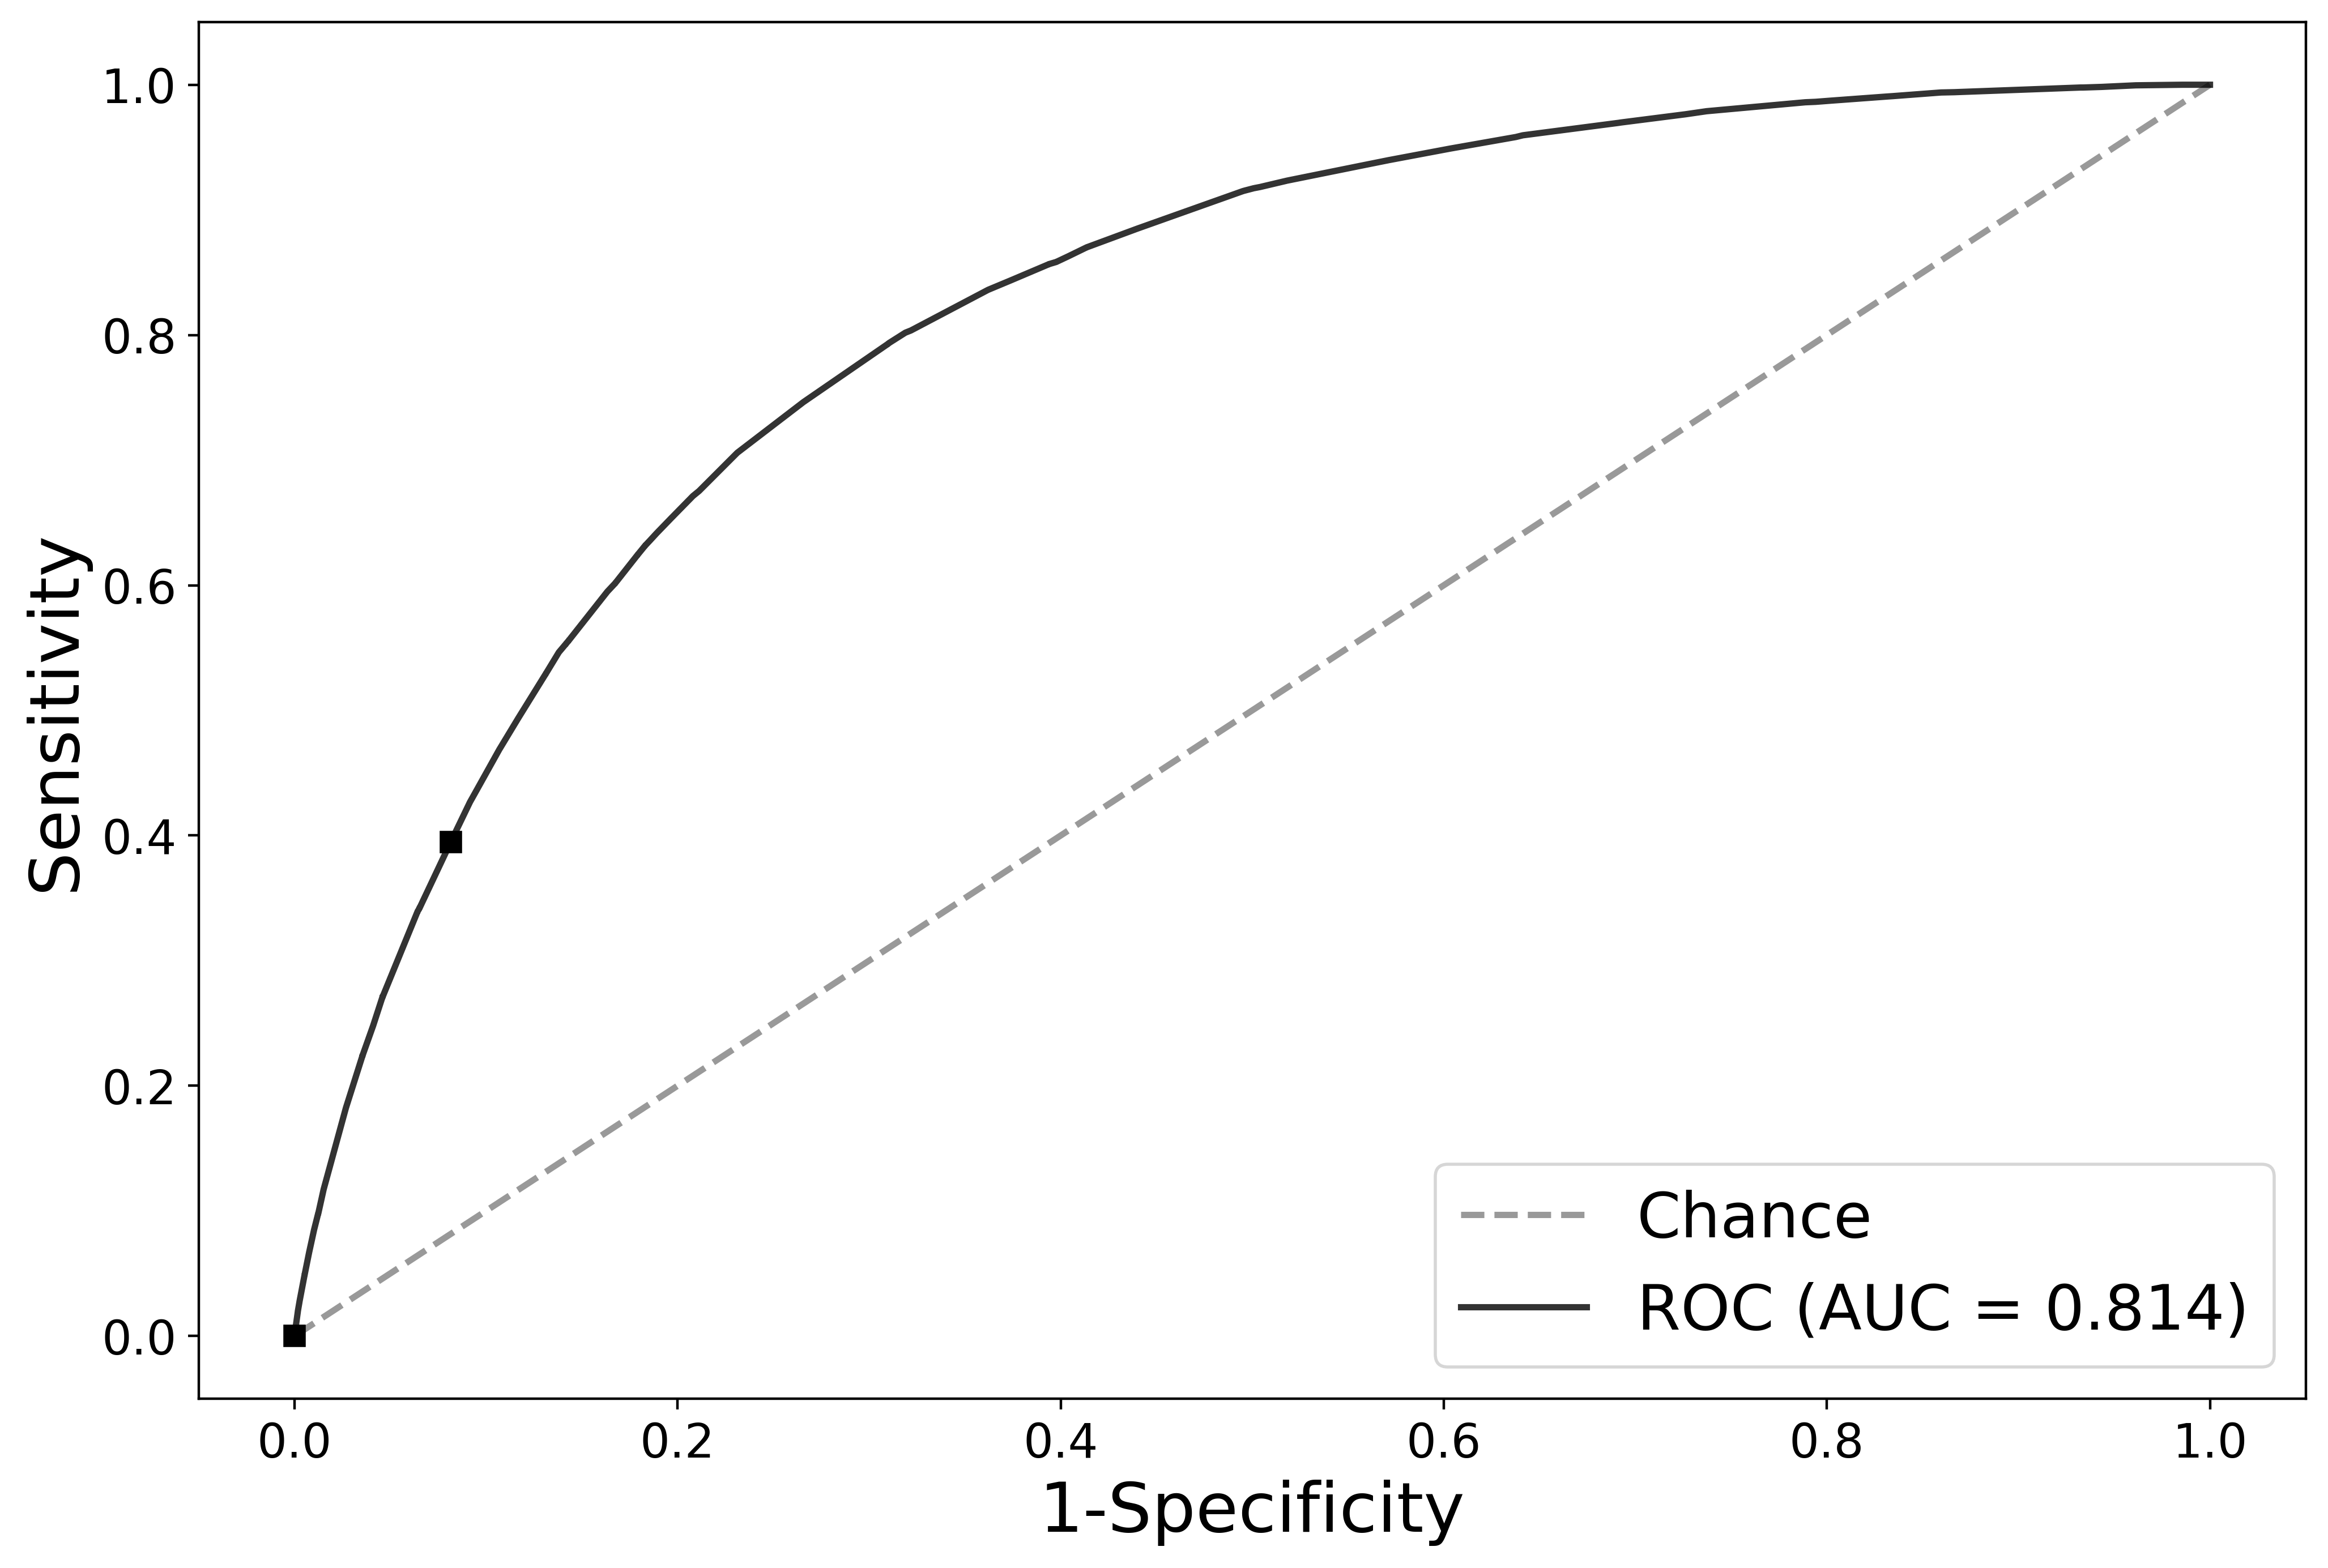

In [10]:
onc_plot_roc(
            y_true=calibrated_results.y, 
            y_pred=calibrated_results.p_calibrated, 
            model_name='./results/mlp_calibrated');

In [11]:
onc_plot_roc_no_threshold(y_true=calibrated_results.y, 
                          y_pred=calibrated_results.p_calibrated, 
                          model_name='./results/mlp_calibrated');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
